In [213]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [214]:
data = pd.read_csv(os.path.join(os.getcwd(),"../data/pokemon.csv"))
assert len(data['name'].value_counts().value_counts())
data = data.set_index('name', drop=True)

# data cleaning: fix non-numeric values etc
data.loc["Minior","capture_rate"] = pd.to_numeric(data["capture_rate"], errors='coerce').median()
data["percentage_male"] = data["percentage_male"].fillna(value=50.0)

assert 1 not in data[["height_m","weight_kg"]].isnull().sum(axis=1).value_counts().index # anythinn with no height also has no weight (we don't need to condition one on the other when fillna)
data["height_m"] = data["height_m"].fillna(value=1.0) # roughtly the median value
data["weight_kg"] = data["weight_kg"].fillna(value=25.0) # again, roughly the median

In [215]:
vector_fields = ['abilities']
against_fields = [x for x in data.columns if x.split("_")[0]=='against']
text_fields = ['classfication', 'japanese_name','type1','type2','is_legendary']
numeric_fields = sorted(set(data.columns) - set(vector_fields) - set(text_fields))
nonagainst_numeric_fields = sorted(set(numeric_fields)-set(against_fields))

field_sets = {
    "vector" : vector_fields,
    "against" : against_fields,
    "text" : text_fields,
    "numeric" : numeric_fields,
    "nonagainst_numeric" : nonagainst_numeric_fields    
}

print({ x.upper() :  ", ".join(y) for x, y in field_sets.items()})

{'VECTOR': 'abilities', 'AGAINST': 'against_bug, against_dark, against_dragon, against_electric, against_fairy, against_fight, against_fire, against_flying, against_ghost, against_grass, against_ground, against_ice, against_normal, against_poison, against_psychic, against_rock, against_steel, against_water', 'TEXT': 'classfication, japanese_name, type1, type2, is_legendary', 'NUMERIC': 'against_bug, against_dark, against_dragon, against_electric, against_fairy, against_fight, against_fire, against_flying, against_ghost, against_grass, against_ground, against_ice, against_normal, against_poison, against_psychic, against_rock, against_steel, against_water, attack, base_egg_steps, base_happiness, base_total, capture_rate, defense, experience_growth, generation, height_m, hp, percentage_male, pokedex_number, sp_attack, sp_defense, speed, weight_kg', 'NONAGAINST_NUMERIC': 'attack, base_egg_steps, base_happiness, base_total, capture_rate, defense, experience_growth, generation, height_m, hp,

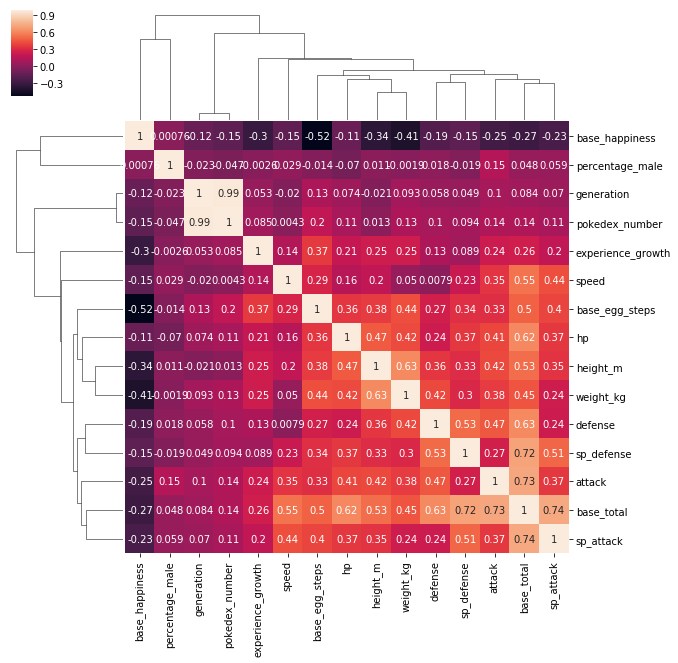

In [216]:
sns.clustermap(data[nonagainst_numeric_fields].corr(), annot=True)
None

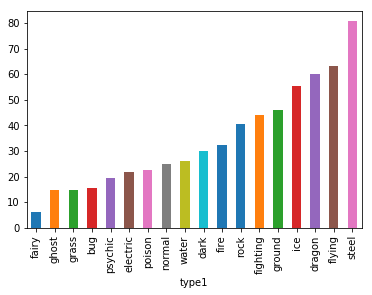

In [233]:
data.groupby('type1')['weight_kg'].median().sort_values().plot(kind='bar')

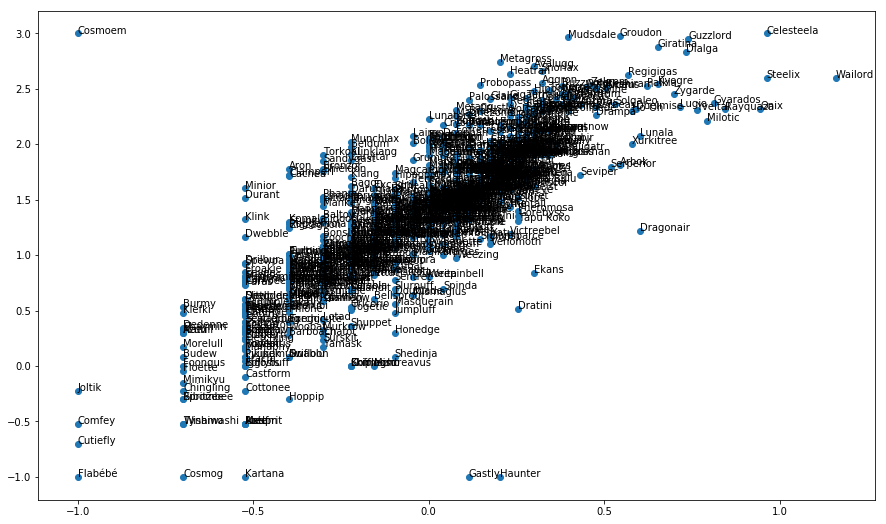

In [248]:
fig, ax = plt.subplots(1,1, figsize=(15,9))
ax.scatter(np.log10(data["height_m"]), np.log10(data['weight_kg']))
for i, txt in enumerate(data.index):
    
    ax.annotate(txt, (np.log10(data['height_m'].values[i]), np.log10(data['weight_kg'].values[i])))
    #if (data['height_m'].values[i] > 5) or (data['weight_kg'].values[i] > 400):
    #    ax.annotate(txt, (np.log10(data['height_m'].values[i]), np.log10(data['weight_kg'].values[i])))
        
    #if (data['height_m'].values[i] <0.2) or (data['weight_kg'].values[i] < 0.5):
    #    ax.annotate(txt, (np.log10(data['height_m'].values[i]), np.log10(data['weight_kg'].values[i])))
None

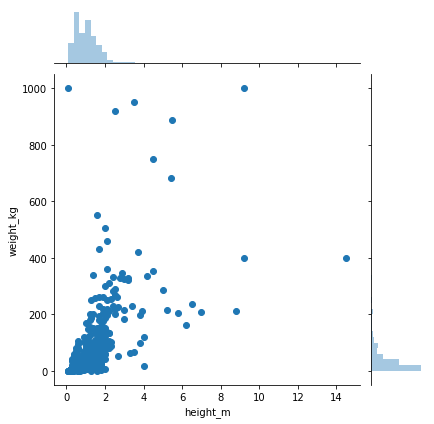

In [237]:
sns.jointplot(data=data[['height_m','weight_kg']], x='height_m', y='weight_kg')

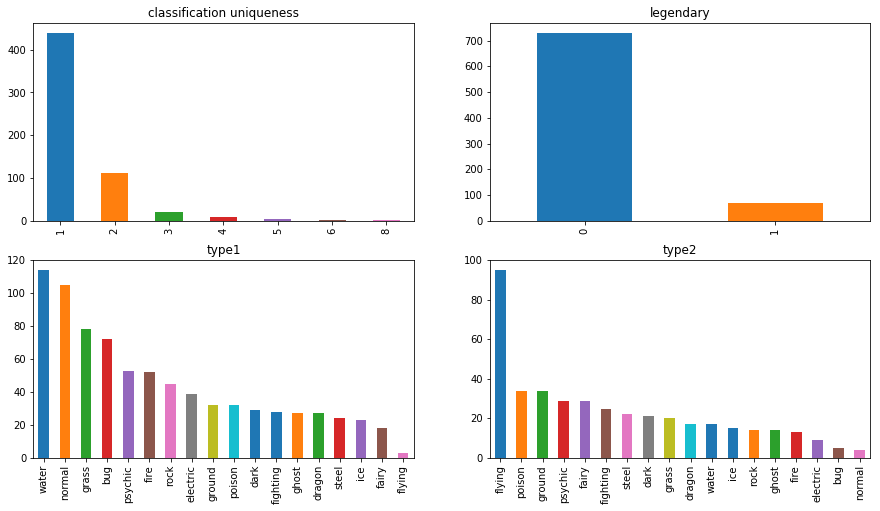

In [217]:
fig, ax = plt.subplots(2,2, figsize=(15,8))

data['type1'].value_counts().plot(kind='bar', ax=ax[1,0], title='type1')
data['type2'].value_counts().plot(kind='bar', ax=ax[1,1], title='type2')
data['classfication'].value_counts().value_counts().plot(kind='bar', title="classification uniqueness", ax=ax[0,0])
data['is_legendary'].value_counts().plot(kind='bar', ax=ax[0,1], title='legendary')
None

In [218]:
y = data['base_total']
y = data['is_legendary']

In [40]:
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [71]:
(data["weight_kg"].median(), data["height_m"].median())

(27.3, 1.0)

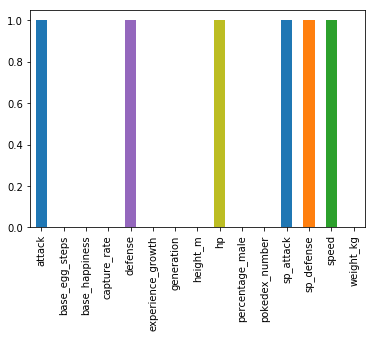

In [92]:
model = LinearRegression(fit_intercept=True)

y=data['base_total']
X=data[sorted(set(nonagainst_numeric_fields)-{y.name})]
model.fit(X,data['base_total'])

pd.Series(model.coef_, X.columns).plot(kind='bar')

#plt.scatter(model.predict(X), y)


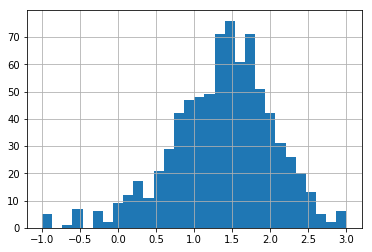

In [17]:
np.log10(data['weight_kg']).hist(bins=30)

# Preprocessing data

In [38]:
X = data[["attack","base_egg_steps"]]

In [55]:
print(1)

1


/home/sejones/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sejones/venv/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


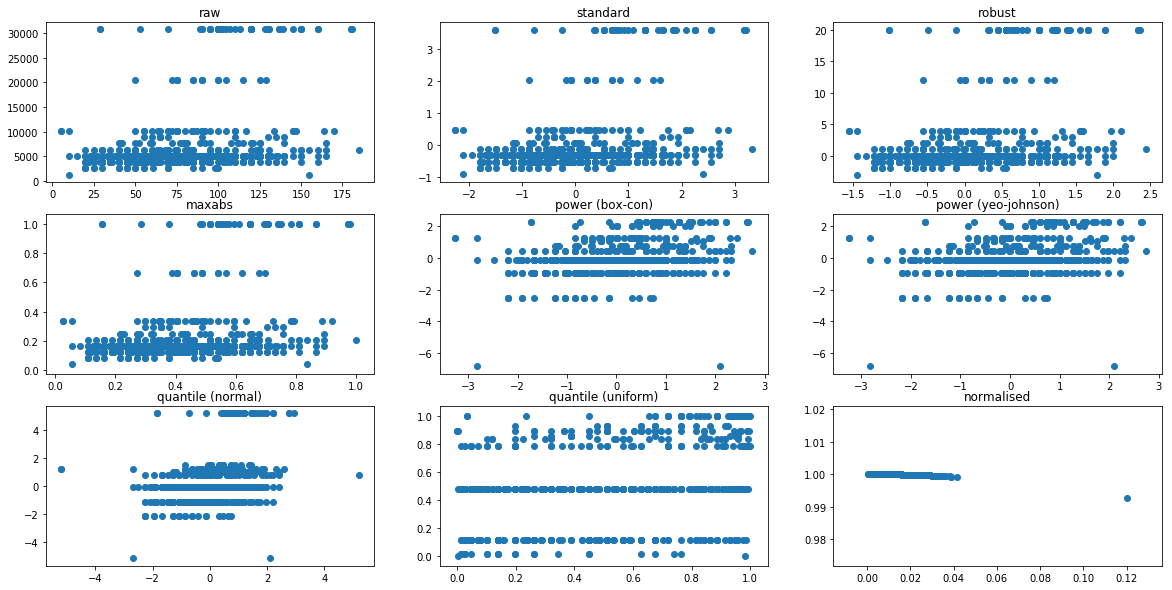

In [62]:
from sklearn.preprocessing import (MinMaxScaler, minmax_scale, MaxAbsScaler, StandardScaler,
                                   RobustScaler, Normalizer, QuantileTransformer, PowerTransformer)

n = 3
fig, ax = plt.subplots(3,n, figsize=(20,10))

i=0
ax_ = ax[i//n,i%n]
ax_.scatter(X.iloc[:,0], X.iloc[:,1])
ax_.set_title("raw")

# remove mean and scale by SD
i=i+1
ax_ = ax[i//n,i%n]
tf = pd.DataFrame(data=StandardScaler().fit_transform(X), index =X.index, columns = X.columns)
ax_.scatter(tf.iloc[:,0], tf.iloc[:,1])
ax_.set_title("standard")

# remove median and scale by IQR
i=i+1
ax_ = ax[i//n,i%n]
tf = pd.DataFrame(data=RobustScaler(quantile_range=(25,75)).fit_transform(X), index =X.index, columns = X.columns)
ax_.scatter(tf.iloc[:,0], tf.iloc[:,1])
ax_.set_title("robust")

# scale max ab values is linear transform so that everything in [0,1]
i=i+1
ax_ = ax[i//n,i%n]
tf = pd.DataFrame(data=MaxAbsScaler().fit_transform(X), index =X.index, columns = X.columns)
ax_.scatter(tf.iloc[:,0], tf.iloc[:,1])
ax_.set_title("maxabs")

# power transformation for positive variables
i=i+1
ax_ = ax[i//n,i%n]
tf = pd.DataFrame(data=PowerTransformer(method='box-cox').fit_transform(X), index =X.index, columns = X.columns)
ax_.scatter(tf.iloc[:,0], tf.iloc[:,1])
ax_.set_title("power (box-cox)")

# power tranformation for al variables
i=i+1
ax_ = ax[i//n,i%n]
tf = pd.DataFrame(data=PowerTransformer(method='yeo-johnson').fit_transform(X), index =X.index, columns = X.columns)
ax_.scatter(tf.iloc[:,0], tf.iloc[:,1])
ax_.set_title("power (yeo-johnson)")

# map to a uniform distribution
i=i+1
ax_ = ax[i//n,i%n]
tf = pd.DataFrame(data=QuantileTransformer(output_distribution='normal').fit_transform(X), index =X.index, columns = X.columns)
ax_.scatter(tf.iloc[:,0], tf.iloc[:,1])
ax_.set_title("quantile (normal)")

# map to a Gaussian distribution
i=i+1
ax_ = ax[i//n,i%n]
tf = pd.DataFrame(data=QuantileTransformer(output_distribution='uniform').fit_transform(X), index =X.index, columns = X.columns)
ax_.scatter(tf.iloc[:,0], tf.iloc[:,1])
ax_.set_title("quantile (uniform)")

# scale such that ||x||=1, in l1, l2 or max norm.
i=i+1
ax_ = ax[i//n,i%n]
tf = pd.DataFrame(data=Normalizer().fit_transform(X), index =X.index, columns = X.columns)
ax_.scatter(tf.iloc[:,0], tf.iloc[:,1])
ax_.set_title("normalised")
None

### Quantile transformer

The empirical CDF of the dataset $F(x) = P(X < x) = \frac 1n\sum_{i=1}^n \mathbb 1_{x<x_i}$

Let $Y = F(X)$, then $P(Y < a) = P(F(X) < a) = P(X < F'(a)) = F(F'(a)) = a$, so $Y$ is uniform

Let $Z = \mathcal N^{-1}(Y)$, then $P(Z < a) = P(\mathcal N^{-1}(Y) < a) = P(Y < \mathcal N(a)) = \mathcal N(a)$, so $Z$ is Gaussian

```QuantileTransformer``` transforms $X$ into uniform $Y$ or Gaussian $Z$. Note that $Y$ is equivalent to ```rank(x)/len(x)```)


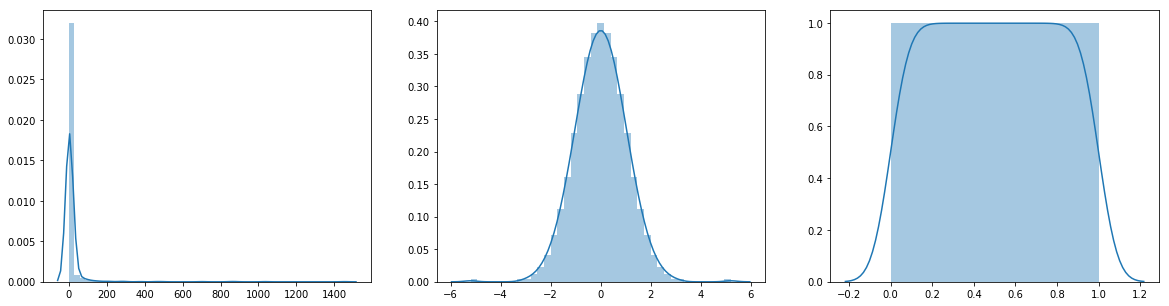

In [165]:
x = np.sort(np.exp(np.concatenate((np.random.normal(-1,1,500), np.random.normal(1,2,500)))))
y = np.arange(len(x))/len(x)
#plt.scatter(x,y, s=1)
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.distplot(x, ax=ax[0])
sns.distplot(QuantileTransformer(output_distribution="uniform").fit_transform(pd.Series(x).to_frame()), ax=ax[2])
sns.distplot(QuantileTransformer(output_distribution="normal").fit_transform(pd.Series(x).to_frame()), ax=ax[1])
None

### PowerTransformer

Power transforms are functions such as $y=(x^\lambda-1)/\lambda$, for $0<\lambda<1$, 'squashing' data so that valued of diffening orders of magnitude become more similar. SKLearn provides two ```PowerTransformer``` implementations, ```box-cox``` and ```yeo-johnson```. The latter admits negative values where the former does not. Both have the option to postprocess by standarising the first two moments.

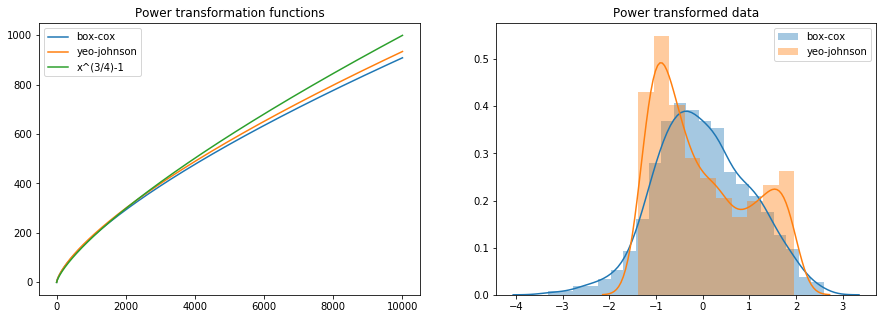

In [166]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

t = pd.Series(np.linspace(0.1,10000,1001)).to_frame()
PowerTransformer(method='box-cox').fit_transform(t)
ax[0].plot(t,PowerTransformer(method='box-cox', standardize=False).fit_transform(t), label='box-cox')
ax[0].plot(t,PowerTransformer(method='yeo-johnson', standardize=False).fit_transform(t), label='yeo-johnson')
ax[0].plot(t,(t**0.75-1), label = 'x^(3/4)-1')
ax[0].legend()
sns.distplot(PowerTransformer(method='box-cox', standardize=True).fit_transform(pd.Series(x).to_frame()), ax=ax[1], label='box-cox')
sns.distplot(PowerTransformer(method='yeo-johnson', standardize=True).fit_transform(pd.Series(x).to_frame()), ax=ax[1], label='yeo-johnson')
plt.legend()
ax[0].set_title('Power transformation functions')
ax[1].set_title('Power transformed data')
None

### Scalers
The ```Scaler``` preprocessers apply a linear transformation to the feature to centre and re-scale it to meet different criteria

- ```StandardScaler```: Recentre on mean  and scale to unit standard deviation
- ```RobustScaler```: Recentre on median and scale to unit interquartile range
- ```MinMaxScaler```: Data spans [0,1]
- ```MaxAbsScaler```: Scale Largest absolute value to 1

### Normalised

Normalizer operates row-wise, on each sample of the data (rather than column-wise on each feature independently, as with the other elements of ```sklearn.preprocessing``` that we have seen) to ensure each sample has unit norm.

In [188]:
unnormalised = pd.DataFrame([[3,0,0],[1,5,1],[3,3,3]])
normalised=pd.DataFrame(data = Normalizer().fit_transform(unnormalised), index=unnormalised.index, columns= unnormalised.columns)
pd.concat((unnormalised, normalised), axis=1)

,0,1,2,0,1,2
0,3,0,0,1.00000,0.00000,0.00000
1,1,5,1,0.19245,0.96225,0.19245
2,3,3,3,0.57735,0.57735,0.57735


# API summary

In [189]:
import sklearn

In [195]:
sklearn

<module 'sklearn' from '/home/sejones/venv/lib/python3.6/site-packages/sklearn/__init__.py'>

In [193]:
sklearn.feature_extraction
sklearn.preprocessing
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [194]:
sklearn.model_selection

AttributeError: module 'sklearn' has no attribute 'model_selection'

In [212]:
# see sklearn api reference
import sklearn.base #
import sklearn.calibration
import sklearn.cluster
import sklearn.compose
import sklearn.covariance
import sklearn.cross_decomposition
import sklearn.datasets
import sklearn.decomposition
import sklearn.discriminant_analysis
import sklearn.dummy
import sklearn.ensemble
import sklearn.feature_extraction
import sklearn.feature_selection
import sklearn.gaussian_process
import sklearn.isotonic
import sklearn.impute
import sklearn.kernel_approximation
import sklearn.kernel_ridge
import sklearn.linear_model
import sklearn.metrics
import sklearn.mixture
import sklearn.model_selection
import sklearn.multiclass
import sklearn.multioutput
import sklearn.naive_bayes
import sklearn.neighbors
import sklearn.neural_network
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.random_projection
import sklearn.semi_supervised
import sklearn.svm
import sklearn.tree
import sklearn.utils


In [203]:
import pkgutil

In [207]:
len(list(pkgutil.iter_modules(['sklearn'])))

0